In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()

/home/osvaldo/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/osvaldo/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Code 4.1

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


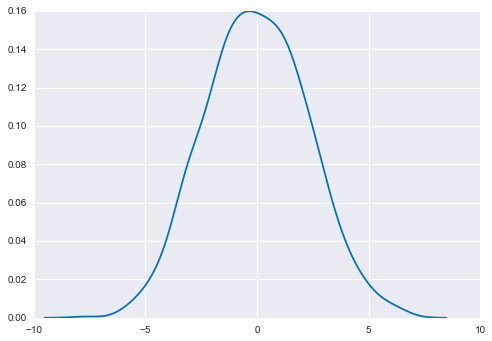

In [2]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
sns.kdeplot(pos);

#### Code 4.2 and 4.3

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


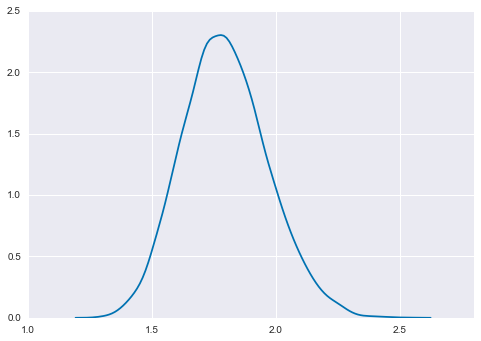

In [3]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
sns.kdeplot(pos);

#### Code 4.4

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


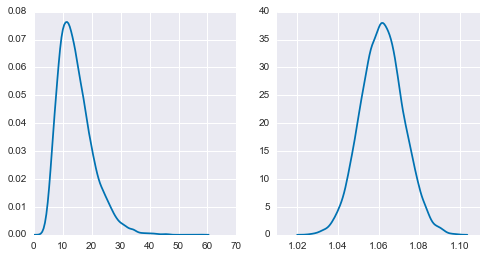

In [4]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1,2, figsize=(8,4))
sns.kdeplot(big, ax=ax[0])
sns.kdeplot(small, ax=ax[1]);

#### Code 4.5

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


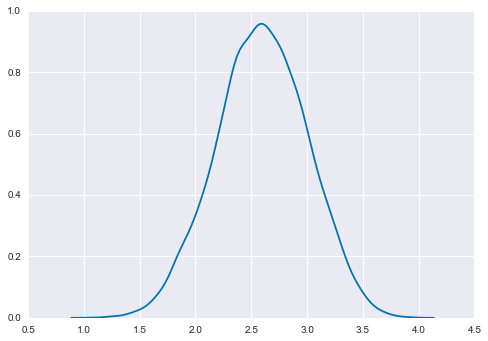

In [5]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
sns.kdeplot(log_big);

#### Code 4.6

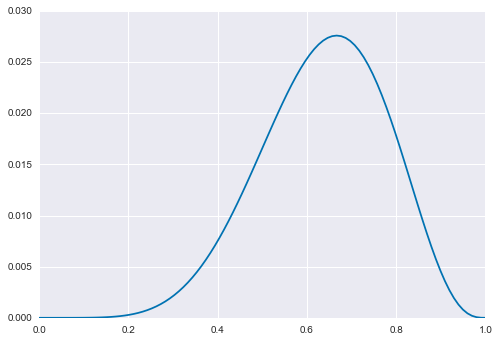

In [6]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior);

#### Code 4.7 and 4.8

In [166]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


#### Code 4.9

In [167]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

#### Code 4.10

In [168]:
d2 = d[d.age >= 18]

#### Code 4.11

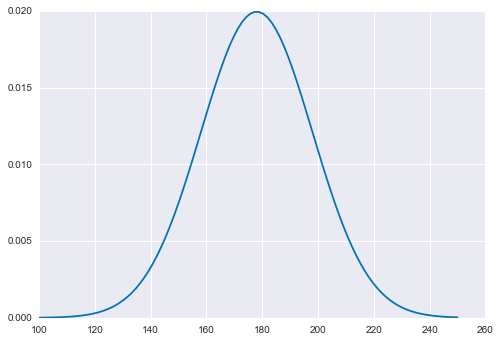

In [10]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.12

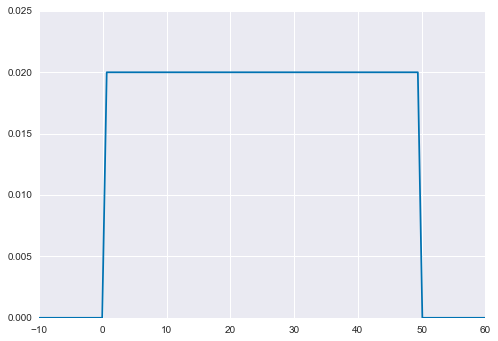

In [11]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.13

/home/osvaldo/anaconda3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:127: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.standard_normal(self._size)
/home/osvaldo/anaconda3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4894: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.uniform(0.0, 1.0, self._size)
/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


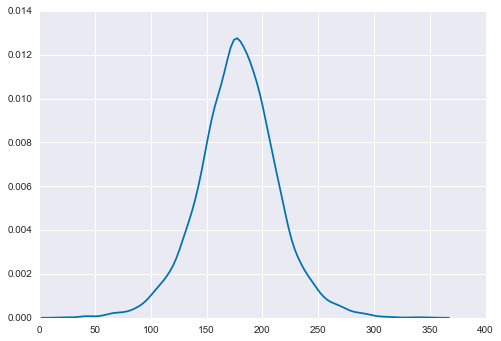

In [12]:
n_samples = 1e4
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
sns.kdeplot(prior_h);

#### Code 4.14

In [13]:
post = np.mgrid[140:160:0.1, 4:9:0.1].reshape(2,-1).T

likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod = likelihood + stats.norm.logpdf(post[:,0], loc=178, scale=20) + stats.uniform.logpdf(post[:,1], loc=0, scale=50)
post_prob = np.exp(post_prod - max(post_prod))

#### Code 4.15 and 4.16

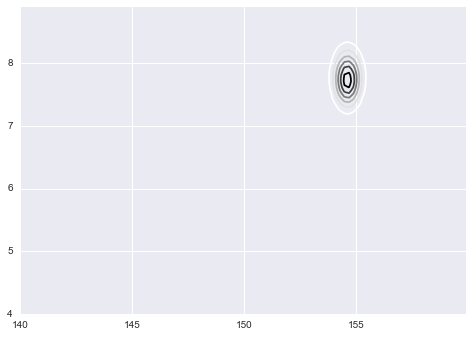

In [14]:
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100)
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
zi = griddata((post[:,0], post[:,1]), post_prob, (xi[None,:], yi[:,None]))

plt.contour(xi, yi, zi);

#### Code 4.17 and 4.18

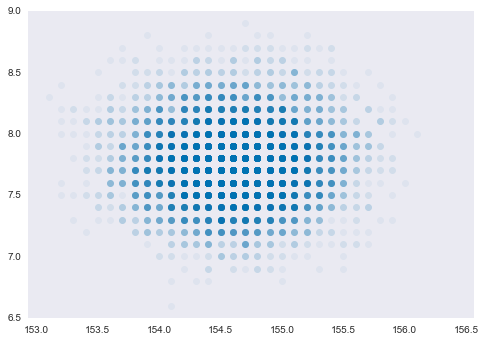

In [15]:
sample_rows = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu = post[:,0][sample_rows]
sample_sigma = post[:,1][sample_rows]

plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)
plt.axis('equal');
plt.grid(False)

#### Code 4.19

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


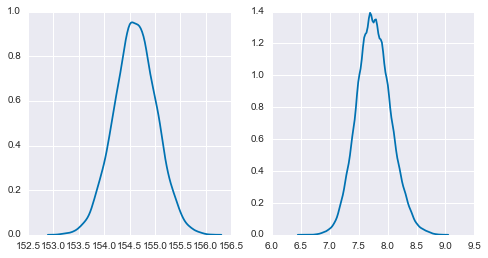

In [16]:
_, ax = plt.subplots(1,2, figsize=(8,4))
sns.kdeplot(sample_mu, ax=ax[0])
sns.kdeplot(sample_sigma, ax=ax[1]);

#### Code 4.20

In [17]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([ 153.8,  155.4]), array([ 7.3,  8.4]))

#### Code 4.21 and  4.22

In [18]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2,-1).T

likelihood2 = [sum(stats.norm.logpdf(d3, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod2 = likelihood + stats.norm.logpdf(post[:,0], loc=178, scale=20) + stats.uniform.logpdf(post[:,1], loc=0, scale=50)
post_prob2 = np.exp(post_prod - max(post_prod))

sample_rows2 = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu2 = post[:,0][sample_rows]
sample_sigma2 = post[:,1][sample_rows]

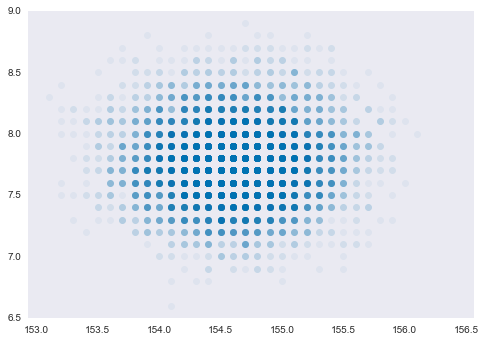

In [19]:
plt.plot(sample_mu2, sample_sigma2, 'o', alpha=0.05)
plt.axis('equal');
plt.grid(False)

#### Code 4.23

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


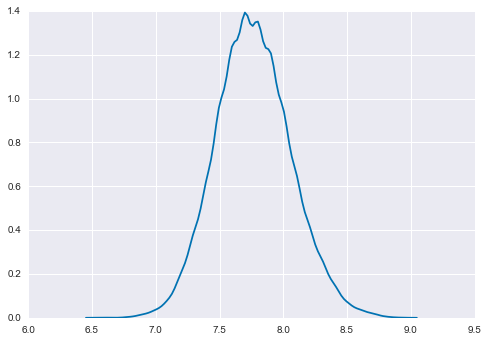

In [20]:
sns.kdeplot(sample_sigma2);

#### Code 4.24

We are repeating code 4.7, 4.8 and 4.10

In [21]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

#### Code 4.25

In [22]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.


#### Code 4.26

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various sampler. Some sampler are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. Sometimes we can use find_MAP() to provide a reasonable starting point for the sampler (see the "start" variable below). Have in mind that this "trick" does not always works and sometimes is better to do not provide an starting point of provide it manually.

See also that the code below give us a message saying that the NUTS sampler has being assigned to the varible "mu" and the variable "sigma_interval_". Notice that it does not saying "sigma" but sigma_interval_ this is because PyMC3 internally modifies some random variables. For now all you need to know is that this trick do not affect the validity of the results is just a trick to speed-up the sampling.

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [23]:
with m4_1:
    start = pm.find_MAP()
    trace_4_1 = pm.sample(1000, start=start)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Assigned NUTS to mu
Assigned NUTS to sigma_interval_
 [-------100%-------] 1000 of 1000 in 0.8 sec. | SPS: 1270.4 | ETA: 0.0

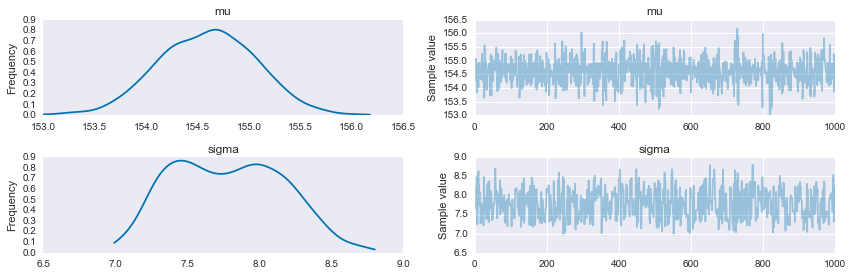

In [24]:
pm.traceplot(trace_4_1); # this function let you check the samples values

#### Code 4.27

Notice that comapred to the table in the book we have an extra column, "mc_error". Since we are sampling from the posterior, there is an error introducing by the sampling process. This error can be reduced by taking more samples.

In [25]:
pm.df_summary(trace_4_1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,154.599123,0.475811,0.015007,153.686186,155.494677
sigma,7.783370,0.383214,0.017759,7.175669,8.518718


#### Code 4.28

As we already said, we can manually pass starting values to the sampler. We can do this by passing start as a dictionary (the problem is that we have to pass variables in the transformed space), see commented code. or we can just pass tesval to each variable we want. As showed below

In [26]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    #start = {'mu':d2.height.mean(), 'sigma':d2.height.std()}
    #trace_4_1 = pm.sample(1000, start=start)
    trace_4_1 = pm.sample(1000)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
Assigned NUTS to mu
Assigned NUTS to sigma_interval_
 [-------100%-------] 1000 of 1000 in 0.6 sec. | SPS: 1786.6 | ETA: 0.0

#### Code 4.29

In [27]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    start = pm.find_MAP()
    trace_4_2 = pm.sample(1000, start=start)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
Assigned NUTS to mu
Assigned NUTS to sigma_interval_
 [-------100%-------] 1000 of 1000 in 0.6 sec. | SPS: 1727.2 | ETA: 0.0

In [28]:
pm.df_summary(trace_4_2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,177.861724,0.112581,0.004325,177.635549,178.053991
sigma,24.560149,1.064142,0.041251,22.501345,26.637485


#### Code 4.30

For some computations could be nice to have the trace turned into a DataFrame, this can be donde using the "trace_to_dataframe" function

In [29]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.208366,0.001484
sigma,0.001484,0.109223


#### Code 4.31

In [30]:
np.diag(trace_df.cov())

array([ 0.20836637,  0.10922278])

In [31]:
trace_df.corr()

,mu,sigma
mu,1.000000,0.009839
sigma,0.009839,1.000000


#### Code 4.32

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [32]:
trace_df.head()

,mu,sigma
0,154.462631,7.682549
1,154.462631,7.682549
2,155.778051,8.012138
3,155.804996,8.060367
4,155.759545,7.980675


Or directly from the trace (we are getting the first ten samples of _sigma_)

In [33]:
trace_4_1['sigma'][:10]

array([ 7.68254871,  7.68254871,  8.01213775,  8.06036673,  7.98067477,
        8.18148424,  8.18148424,  7.77940355,  7.49200864,  7.96401678])

#### Code 4.33

In our case, this is the same we did in the code 4.27

In [34]:
pm.df_summary(trace_4_1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,154.629627,0.456243,0.018831,153.764709,155.543041
sigma,7.772738,0.330323,0.011020,7.072777,8.383995


#### Code 4.34

In [35]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[ 154.78054797,    7.68593809],
       [ 154.7500625 ,    7.8020064 ],
       [ 153.55509787,    8.39299978],
       [ 153.9254597 ,    8.05934735],
       [ 155.04652566,    7.93361092],
       [ 155.62937576,    7.49345523],
       [ 154.35847265,    7.35959943],
       [ 154.66485968,    7.91492341],
       [ 155.20038515,    7.56363239],
       [ 154.95752643,    7.43177641]])

#### Code 4.35 and 4.36

Instead of sampling from a normal and then exponentiating to ensure sigma is positive, we can use the lognormal distribution for the same result. The Lognormal distribution is parametrized in terms of $\tau$ (tau) the precision and not the standard deviation, where: 

$$tau=\frac{1}{sd^2}$$

The normal distribution can also be parametrized in terms of the precision (tau). Given that the conversion between both parametrization is done right, which one to use is only a matter of convenience. 

In [36]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    start = pm.find_MAP()
    trace_4_1_logsigma = pm.sample(2000, start=start)

Applied log-transform to sigma and added transformed sigma_log_ to model.
Assigned NUTS to mu
Assigned NUTS to sigma_log_
 [-------100%-------] 2000 of 2000 in 1.4 sec. | SPS: 1416.6 | ETA: 0.0

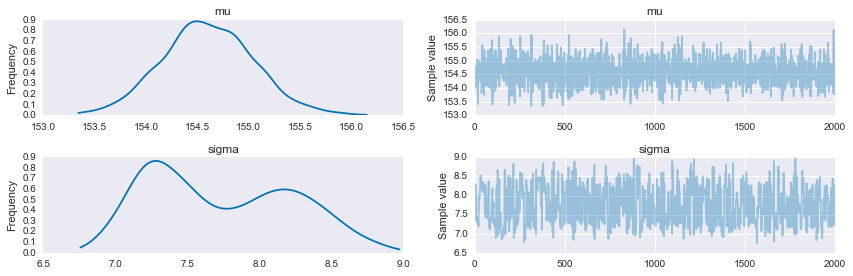

In [37]:
pm.traceplot(trace_4_1_logsigma);

#### Code 4.37

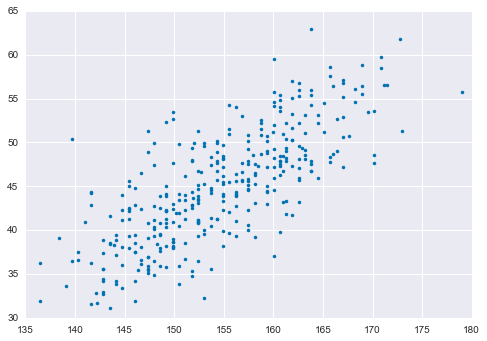

In [38]:
plt.plot(d2.height, d2.weight, '.');

#### Code 4.38 and 4.39

Notice that the variable mu is defined as alpha + beta * d2.weight in a single line. If we want the trace to containt mu we can write as a deterministic varible. The computating will be exactly the same. The only diference is that mu will be accesible in the trace.

In [86]:
with pm.Model() as m4_3:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight
    #mu = pm.Deterministic('mu' alpha + beta * d2.weight) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    start = pm.find_MAP()
    trace_4_3 = pm.sample(2000, start=start)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_interval_
 [-------100%-------] 2000 of 2000 in 3.5 sec. | SPS: 577.9 | ETA: 0.0

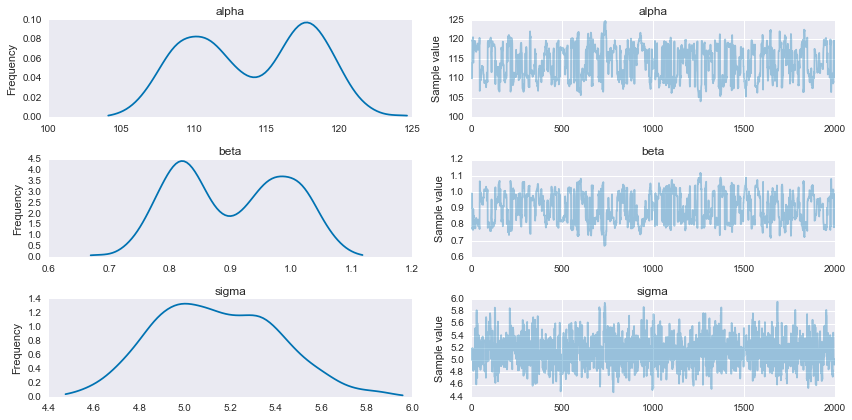

In [40]:
pm.traceplot(trace_4_3);

Another alternative is to write mu inside the likelihood and not as a separate line.

    height = pm.Normal('height', mu=alpha + beta * d2.weight, sd=sigma, observed=d2.height)
    
Using PyMC3 there is not too much reason to do this. I personally think that defining mu in a separate lines improves readability.

#### Code 4.40

In [41]:
pm.df_summary(trace_4_3, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha,113.99,4.30,0.25,107.72,119.98
beta,0.90,0.09,0.01,0.77,1.04
sigma,5.14,0.27,0.01,4.70,5.55


#### Code 4.41

In [42]:
trace_df = pm.trace_to_dataframe(trace_4_3)
trace_df.corr().round(2)

,beta,sigma,alpha
beta,1.00,-0.07,-1.00
sigma,-0.07,1.00,0.07
alpha,-1.00,0.07,1.00


#### Code 4.42

In [169]:
d2['weight_c'] = d2.weight - d2.weight.mean()

/home/osvaldo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Code 4.43

In [170]:
with pm.Model() as m4_4:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight_c
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    start = pm.find_MAP()
    trace_4_4 = pm.sample(2000, start=start)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_interval_
 [-------100%-------] 2000 of 2000 in 1.6 sec. | SPS: 1217.3 | ETA: 0.0

#### Code 4.44

In [171]:
pm.df_summary(trace_4_4, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5
alpha,154.60,0.29,0.01,154.12,155.05
beta,0.91,0.05,0.00,0.83,0.98
sigma,5.11,0.28,0.01,4.66,5.52


#### Code 4.45

Instead of using the MAP, we are going to use the mean of the posterior 

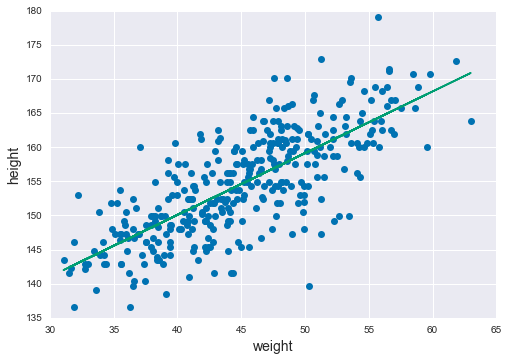

In [172]:
plt.plot(d2.weight, d2.height, 'o')
plt.plot(d2.weight, trace_4_3['alpha'].mean() + trace_4_3['beta'].mean() * d2.weight)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.46 and 4.47

In [173]:
pm.trace_to_dataframe(trace_4_4)[:5]

,beta,sigma,alpha
0,0.863545,5.330868,154.862842
1,0.863545,5.330868,154.862842
2,0.863545,5.330868,154.862842
3,0.947712,5.520429,154.285092
4,0.916594,5.390361,155.091055


#### Code 4.48

In [187]:
N = 10
with pm.Model() as m_N:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * d2.weight[:N])
    height_hat = pm.Normal('height_hat', mu=mu, sd=sigma, observed=d2.height[:N])
    trace_N = pm.sample(2000)

Applied interval-transform to sigma and added transformed sigma_interval_ to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_interval_
 [-------100%-------] 2000 of 2000 in 3.6 sec. | SPS: 563.1 | ETA: 0.0

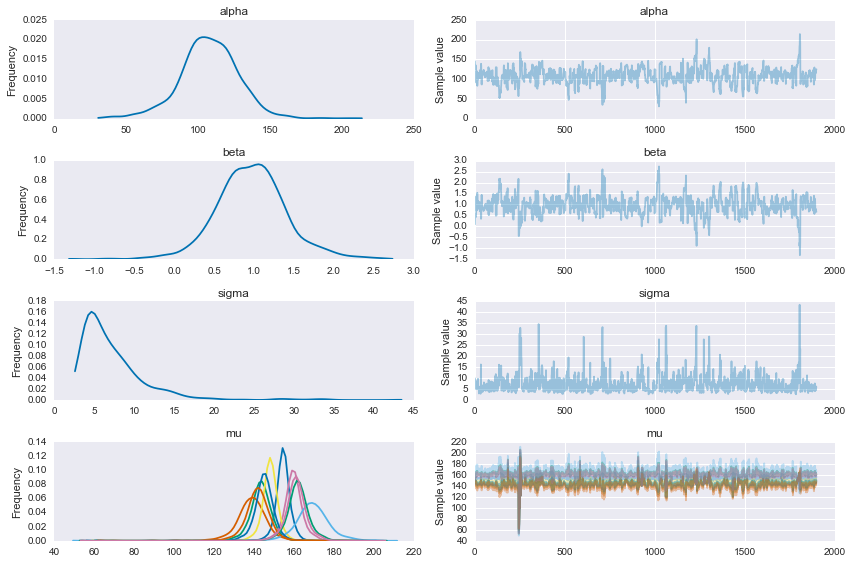

In [188]:
chain_N = trace_N[100:]
pm.traceplot(chain_N);

#### Code 4.49

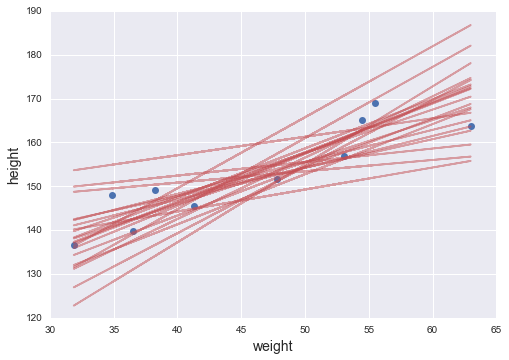

In [189]:
plt.plot(d2.weight[:N], d2.height[:N], 'bo')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['alpha'][idx] + chain_N['beta'][idx] * d2.weight[:N], 'r-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

Alternative we can directly use the deterministic mu variable

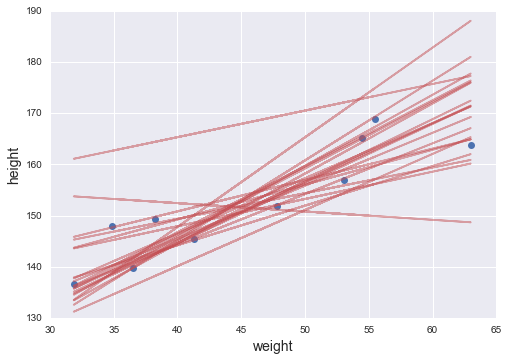

In [190]:
plt.plot(d2.weight[:N], d2.height[:N], 'bo')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['mu'][idx], 'r-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.50 and 4.51

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


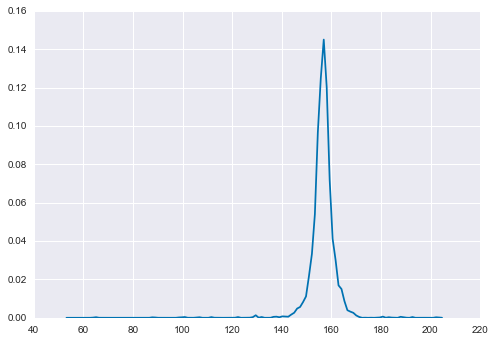

In [191]:
mu_at_50 = chain_N['alpha'] + chain_N['beta'] * 50
sns.kdeplot(mu_at_50);

#### Code 4.52

In [192]:
pm.hpd(mu_at_50, alpha=.89)

array([ 157.09556091,  157.77416963])

#### Code 4.3

Using PyMC3, we do not need to compute anything else. The deterministic variable mu, is a matrix with row samples from the posterior and columns values of weights.

In [193]:
df_trace_N = pm.trace_to_dataframe(chain_N)
df_trace_N.head()

,beta,sigma,alpha,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9
0,0.095167,9.887380,144.993239,149.544680,148.465500,148.025735,150.041103,148.921454,150.988083,148.632773,150.273127,148.311717,150.178699
1,0.095167,9.887380,144.993239,149.544680,148.465500,148.025735,150.041103,148.921454,150.988083,148.632773,150.273127,148.311717,150.178699
2,0.500844,8.613061,129.318047,153.271234,147.591759,145.277373,155.883793,149.991337,160.867533,148.472078,157.104880,146.782434,156.607926
3,0.554076,5.291698,125.288627,151.787660,145.504546,142.944177,154.677892,148.159161,160.191324,146.478428,156.028762,144.609202,155.478989
4,0.480832,8.647175,131.666180,154.662265,149.209726,146.987816,157.170433,151.513424,161.955037,150.054870,158.342729,148.432739,157.865632


#### Code 4.X

#### Code 4.X

#### Code 4.X

#### Code 4.X

#### Code 4.X

#### Code 4.X

#### Code 4.X

In [43]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.5.2
IPython 5.0.0
PyMC3 3.0.rc1
NumPy 1.11.1
Pandas 0.18.1
SciPy 0.18.1
Matplotlib 1.5.3
Seaborn 0.7.1

